In [1]:
#! pip install climetlab_s2s_ai_competition climetlab --quiet
#! pip install --upgrade climetlab_s2s_ai_competition --quiet

In [2]:
import climetlab as cml 

module 'Magics' has no attribute 'strict_mode'


In [3]:
import climetlab_s2s_ai_competition
print(f'Climetlab version : {cml.__version__}')
print(f'Climetlab-s2s-ai-competition plugin version : {climetlab_s2s_ai_competition.__version__}')

Climetlab version : 0.1.10
Climetlab-s2s-ai-competition plugin version : 0.2.0


In [4]:
import xarray as xr

In [5]:
#xr.open_dataset('https://storage.ecmwf.europeanweather.cloud/s2s-ai-competition/data/reference-set/0.1.20/zarr/rt-20200102.zarr',
#engine ='zarr')


# Using Zarr data

## Version 0.1.20 

In [6]:
version = '0.1.20'

Let us get the zarr pointer to the data for total precipitation (tp) for one date :

In [7]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102"],
                         version=version,
                         format='zarr')

By downloading data from this dataset, you agree to the their terms: Attribution 4.0 International(CC BY 4.0). If you do not agree with such terms, do not download the data. For more information, please visit https://www.ecmwf.int/en/terms-use and https://apps.ecmwf.int/datasets/data/s2s/licence/.
{'url': 'https://storage.ecmwf.europeanweather.cloud', 'data': 's2s-ai-competition/data', 'dataset': 'reference-set', 'version': '0.1.20', 'fctype': 'rt', 'date': ['20200102'], 'format': 'zarr', 'extension': 'zarr'}
['https://storage.ecmwf.europeanweather.cloud/s2s-ai-competition/data/reference-set/0.1.20/zarr/rt-20200102.zarr']


This climetlab dataset can be used as a xarray.Dataset or as a pandas.DataFrame :

In [8]:
cmlds.to_xarray()

<xarray.Dataset>
Dimensions:        (forecast_time: 1, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    t2m            (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 47, 121, 240), meta=np.ndarray>
    time           (forecast_time, step) datetime64[ns] dask.array<chunksize=(1, 47), meta=np.ndarray>
    tp             (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 47, 121, 240), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             European Centre for Medium-Range Weather Forecasts

In [9]:
# cmlds.to_pandas() # TODO : implement to_pandas()

The "date" argument also accept lists of values.

In [10]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102", "20200109"],
                         version=version,
                         format='zarr')
cmlds.to_xarray()

{'url': 'https://storage.ecmwf.europeanweather.cloud', 'data': 's2s-ai-competition/data', 'dataset': 'reference-set', 'version': '0.1.20', 'fctype': 'rt', 'date': ['20200102', '20200109'], 'format': 'zarr', 'extension': 'zarr'}
['https://storage.ecmwf.europeanweather.cloud/s2s-ai-competition/data/reference-set/0.1.20/zarr/rt-20200102.zarr', 'https://storage.ecmwf.europeanweather.cloud/s2s-ai-competition/data/reference-set/0.1.20/zarr/rt-20200109.zarr']


<xarray.Dataset>
Dimensions:        (forecast_time: 2, latitude: 121, longitude: 240, realization: 51, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2020-01-02 2020-01-09
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 ... 44 45 46 47 48 49 50
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    t2m            (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 47, 121, 240), meta=np.ndarray>
    time           (forecast_time, step) datetime64[ns] dask.array<chunksize=(1, 47), meta=np.ndarray>
    tp             (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 47, 121, 240), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             European Centre for Medium-Range Weather Forecasts

In [11]:
cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
                         date=["20200102"],
                         version=version,
                         hindcast=True,
                         format='zarr')
cmlds.to_xarray()

{'url': 'https://storage.ecmwf.europeanweather.cloud', 'data': 's2s-ai-competition/data', 'dataset': 'reference-set', 'version': '0.1.20', 'fctype': 'hc', 'date': ['20200102'], 'format': 'zarr', 'extension': 'zarr'}
['https://storage.ecmwf.europeanweather.cloud/s2s-ai-competition/data/reference-set/0.1.20/zarr/hc-20200102.zarr']


<xarray.Dataset>
Dimensions:        (forecast_time: 20, latitude: 121, longitude: 240, realization: 11, step: 47)
Coordinates:
  * forecast_time  (forecast_time) datetime64[ns] 2000-01-02 ... 2019-01-02
  * latitude       (latitude) float64 90.0 88.5 87.0 85.5 ... -87.0 -88.5 -90.0
  * longitude      (longitude) float64 0.0 1.5 3.0 4.5 ... 355.5 357.0 358.5
  * realization    (realization) int64 0 1 2 3 4 5 6 7 8 9 10
  * step           (step) timedelta64[ns] 0 days 1 days ... 45 days 46 days
Data variables:
    t2m            (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 47, 121, 240), meta=np.ndarray>
    time           (forecast_time, step) datetime64[ns] dask.array<chunksize=(20, 47), meta=np.ndarray>
    tp             (realization, forecast_time, step, latitude, longitude) float32 dask.array<chunksize=(1, 1, 47, 121, 240), meta=np.ndarray>
Attributes:
    Conventions:             CF-1.7
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_edition:            2
    GRIB_subCentre:          0
    institution:             European Centre for Medium-Range Weather Forecasts

In [12]:
# TODO
# import pandas as pd
# date=pd.date_range(start="2020-01-02", end="2020-01-31", freq="w-thu"), 
# from datetime import datetime
# date=[datetime(2020,1,2), "2020-01-09"],
#cmlds = cml.load_dataset("s2s-ai-competition-reference-set",
#                         date=date,
#                         version=version,
#                         hindcast=True,
#                         format='zarr')
#cmlds.to_xarray()

### Computing average and plotting

In [13]:
ds = cmlds.to_xarray()

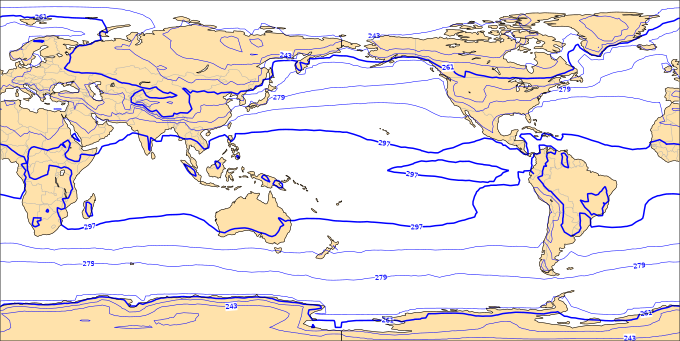

In [14]:
mean1 = ds.mean(dim="step")
cml.plot_map(mean1.isel(forecast_time=0, realization=0))

/home/mafp/.local/lib/python3.8/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


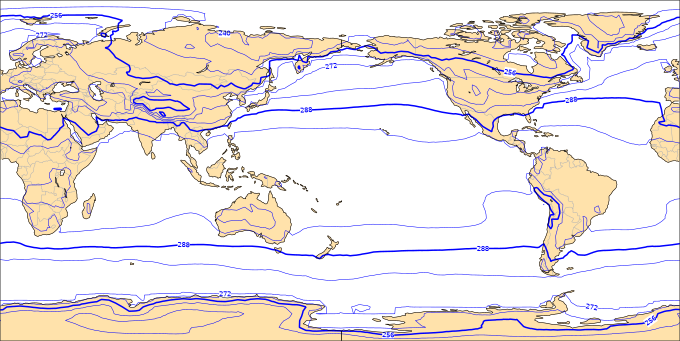

In [15]:
mean2 = ds.mean(dim="forecast_time")
cml.plot_map(mean2.isel(step=20, realization=0))

In [16]:
#mean3 = ds.mean(dim="time")
#cml.plot_map(mean3.isel(forecast_time=20, realization=0))